# Basics of Markov Decision Process (MDP) using Python

## Markov Chain basics
Andrey Markov was a Russian mathematician who studied stochastic processes. Markov was particularly interested in systems that follow a chain of linked events. In 1906, Markov produced interesting results about discrete processes that he called chain. A **Markov Chain** has a set of states S={s0,s1,...,sm} and a process that can move successively from one state to another. Each move is a single step and is based on a transition model T

To summarise a Markov chain is defined by:

$\bf{Set\ of\ possible\ States:}S=\{{s_0,s_1,...,s_m}\}$

$\bf{Initial\ State}: s_0$

$\bf{Transition\ Model}: T(s,s^′)$

A Markov chain is based on the Markov Property. The Markov property states that **given the present, the future is conditionally independent of the past.**

Let’s suppose we have a chain with only two states $s_0$ and $s_1$, where $s_0$ is the initial state. The process is in $s_0$ 90% of the time and it can move to $s_1$ the remaining 10% of the time. When the process is in state $s_1$ it will remain there 50% of the time.

So, the transition matrix can be written as,

$$T=\quad
\begin{bmatrix}
0.9 & 0.1 \\
0.5 & 0.5
\end{bmatrix}$$

The transition matrix is always a square matrix, and since we are dealing with probability distributions all the entries are within 0 and 1 and a single row sums to 1.

Here is the state diagram,

![MDP-1](https://mpatacchiola.github.io/blog/images/simple_markov_chain.png)

### Import libraries

In [3]:
import numpy as np

### Define the transition matrix as numpy array

In [4]:
#Declaring the Transition Matrix T
T = np.array([[0.90, 0.10],
              [0.50, 0.50]])

### Compute the _k-step evolution_ of the transition matrix

Suppose we have to guess were the process will be after 3 steps and after 50 steps. 

How can we do it? 

We are interested in chains that have a finite number of states and are time-homogeneous meaning that the transition matrix does not change over time. Given these assumptions we can compute the _k-step transition probability_ as the $k^{th}$ power of the transition matrix

In [5]:
#Obtaining T after 3 steps
T_3 = np.linalg.matrix_power(T, 3)
#Obtaining T after 50 steps
T_50 = np.linalg.matrix_power(T, 50)
#Obtaining T after 100 steps
T_100 = np.linalg.matrix_power(T, 100)

### Print the resulting matrices and see that there is no change between $T_{50}$ and $T_{100}$

In [6]:
#Printing the matrices
print("T: " + str(T))
print("T_3: " + str(T_3))
print("T_50: " + str(T_50))
print("T_100: " + str(T_100))

T: [[0.9 0.1]
 [0.5 0.5]]
T_3: [[0.844 0.156]
 [0.78  0.22 ]]
T_50: [[0.83333333 0.16666667]
 [0.83333333 0.16666667]]
T_100: [[0.83333333 0.16666667]
 [0.83333333 0.16666667]]


### Initial state and its evolution through transition

Now we define the initial distribution which represent the state of the system at k=0. Our system is composed of two states and we can model the initial distribution as a vector with two elements, the first element of the vector represents the probability of staying in the state $s_0$ and the second element the probability of staying in state $s_1$. Let’s suppose that we start from $s_0$, the vector **v** representing the initial distribution will have this form:
$$\bf{v=\{1,0\}}$$

We can calculate the probability of being in a specific state after k iterations multiplying the initial distribution and the transition matrix:
$$\bf{v.T^k}$$

In [7]:
#Declaring the initial distribution
v = np.array([[1.0, 0.0]])

In [8]:
print("v: " + str(v))
print("v_1: " + str(np.dot(v,T)))
print("v_3: " + str(np.dot(v,T_3)))
print("v_50: " + str(np.dot(v,T_50)))
print("v_100: " + str(np.dot(v,T_100)))

v: [[1. 0.]]
v_1: [[0.9 0.1]]
v_3: [[0.844 0.156]]
v_50: [[0.83333333 0.16666667]]
v_100: [[0.83333333 0.16666667]]


This is what is going on,

![](https://mpatacchiola.github.io/blog/images/markov_chain_tree.png)

### Now let's define a quite different initial state and see what happens

Let’s suppose that we start from $s_0$, the vector **v** representing the initial distribution with this form:
$$\bf{v=\{0.5,0.5\}}$$

In [9]:
v = np.array([[0.5, 0.5]])

print("v: " + str(v))
print("v_1: " + str(np.dot(v,T)))
print("v_3: " + str(np.dot(v,T_3)))
print("v_50: " + str(np.dot(v,T_50)))
print("v_100: " + str(np.dot(v,T_100)))

v: [[0.5 0.5]]
v_1: [[0.7 0.3]]
v_3: [[0.812 0.188]]
v_50: [[0.83333333 0.16666667]]
v_100: [[0.83333333 0.16666667]]


### What is happening in the long run? 

The result after 50 and 100 iterations are the same and `v_50` is equal to `v_100` no matter which starting distribution we have. The chain converged to equilibrium meaning that as the time progresses it forgets about the starting distribution. 

But we have to be careful, the convergence is not always guaranteed. The dynamics of a Markov chain can be very complex, in particular it is possible to have transient and recurrent states.

## Markov Decision Process (MDP)

In reinforcement learning, MDP is an extremely useful concept and a starting point for discussion. Formally, a MDP is a reinterpretation of Markov chains which includes an **agent** and a **decision making process**.

A MDP is defined by the following components:

1. Set of possible States: $S = \{s_0,s_1,...,s_m\}$
2. Initial state: $s_0$
3. Set of possible Actions: $A=\{a_0,a_1,...,a_n\}$
4. Transition Model: $T(s,a,s')$
5. Reward function: $R(s)$

The transition model returns the probability of reaching the state $s′$ if the action $a$ is done in state $s$. But given $s$ and $a$ the model is conditionally independent of all previous states and actions (Markov Property). 

Moreover, there is the Reward function $R(s)$ which return a real value every time the agent moves from one state to the other. Since we have a reward function we can say that some states are more desirable that others because when the agent moves in those states it receives an higher reward. On the opposite there are states that are not desirable at all, because when the agent moves there it receives a negative reward.

***So, what is the computing problem and what is a possible solution in this setting?***

* **Problem**: The agent has to maximize the reward avoiding states which return negative values and choosing the one which return positive values.

* **Solution**: To find a policy $\pi(s)$ which returns the action with the highest reward. The agent can try different policies but only one of those can be considered an optimal policy, denoted by $\pi^*$, which yields to the **highest expected utility**.

### Transition matrix generation

In [38]:
def return_transition(tot_row, tot_col):
    
    T = np.zeros((12, 12, 4))
    counter = 0
    
    def return_extended_world(row, col, action, tot_row, tot_col):
    
        extended_world = np.zeros((tot_row+2, tot_col+2))

        #If the state is on the grey-obstacle it returns all zeros
        if(row == 1 and col == 1): return extended_world[1:4, 1:5]
        #If the process is on the final reward state it returns zeros
        if(row == 0 and col == 3): return extended_world[1:4, 1:5]
        #If the process is on the final punishment state then returns zeros
        if(row == 1 and col == 3): return extended_world[1:4, 1:5]

        if(action=="up"):
                col += 1
                row += 1
                extended_world[row-1, col] = 0.8
                extended_world[row, col+1] = 0.1  
                extended_world[row, col-1] = 0.1           
        elif(action=="down"): 
                col += 1
                row += 1
                extended_world[row+1, col] = 0.8
                extended_world[row, col+1] = 0.1  
                extended_world[row, col-1] = 0.1
        elif(action=="left"):
                col += 1
                row += 1
                extended_world[row-1, col] = 0.1
                extended_world[row+1, col] = 0.1  
                extended_world[row, col-1] = 0.8
        elif(action=="right"):
                col += 1
                row += 1
                extended_world[row-1, col] = 0.1
                extended_world[row+1, col] = 0.1  
                extended_world[row, col+1] = 0.8

        #Reset the obstacle
        if(extended_world[2, 2] != 0): extended_world[row, col] += extended_world[2, 2]
        extended_world[2, 2] = 0.0

        #Control bouncing
        for row in range(0, 5):   
                if(extended_world[row, 0] != 0): extended_world[row, 1] += extended_world[row, 0]
                if(extended_world[row, 5] != 0): extended_world[row, 4] += extended_world[row, 5]
        for col in range(0, 6):
                if(extended_world[0, col] != 0): extended_world[1, col] += extended_world[0, col]
                if(extended_world[4, col] != 0): extended_world[3, col] += extended_world[4, col]

        return extended_world[1:4, 1:5]
    
    for row in range(0, 3):
        for col in range(0, 4):
            line = return_extended_world(row, col, action="up", tot_row=3, tot_col=4)
            T[counter, : , 0] = line.flatten()
            line = return_extended_world(row, col, action="left", tot_row=3, tot_col=4)
            T[counter, : , 1] = line.flatten()
            line = return_extended_world(row, col, action="down", tot_row=3, tot_col=4)
            T[counter, : , 2] = line.flatten()
            line = return_extended_world(row, col, action="right", tot_row=3, tot_col=4)
            T[counter, : , 3] = line.flatten()

            counter += 1
    
    return T

In [46]:
T=return_transition(3,4)

In [47]:
T.shape

(12, 12, 4)

In [48]:
T

array([[[0.9, 0.9, 0.1, 0.1],
        [0.1, 0. , 0.1, 0.8],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0.1, 0.8, 0.1],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[0.1, 0.8, 0.1, 0. ],
        [0.8, 0.2, 0.8, 0.2],
        [0.1, 0. , 0.1, 0.8],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. ],
        [0.1, 0.8, 0.1, 0. ],
        [0.8, 0.1, 0. , 0.1],
        [0.1, 0. , 0.1, 0.8],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0.1, 0.8, 0.1],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
      

### Function to compute state utility value 

In [49]:
def return_state_utility(v, T, u, reward, gamma):
    """Return the state utility.

    @param v the state vector
    @param T transition matrix
    @param u utility vector
    @param reward for that state
    @param gamma discount factor
    @return the utility of the state
    """
    import numpy as np
    action_array = np.zeros(4)
    for action in range(0, 4):
        action_array[action] = np.sum(np.multiply(u, np.dot(v, T[:,:,action])))
        
    return reward + gamma * np.max(action_array)

### Testing the utility of (1,1) for the small Grid World

In [50]:
#Starting state vector
#The agent starts from (1, 1)
v = np.array([[0.0, 0.0, 0.0, 0.0, 
                0.0, 0.0, 0.0, 0.0, 
                1.0, 0.0, 0.0, 0.0]])

#Utility vector
u = np.array([[0.812, 0.868, 0.918,   1.0,
               0.762,   0.0, 0.660,  -1.0,
               0.705, 0.655, 0.611, 0.388]])

#Defining the reward for state (1,1)
reward = -0.04
#Assuming that the discount factor is equal to 1.0
gamma = 1.0

#Use the Bellman equation to find the utility of state (1,1)
utility_11 = return_state_utility(v, T, u, reward, gamma)
print("Utility of state (1,1): " + str(utility_11))

Utility of state (1,1): 0.7056


### Value iteration function

In [71]:
def value_iteration(transition_matrix,reward_vector,gamma=0.999,epsilon=0.01):
    """
    gamma = 0.999 #Discount factor
    epsilon = 0.01 #Stopping criteria small value
    """
    
    tot_states = 12
    iteration = 0 #Iteration counter

    #List containing the data for each iteation
    graph_list = list()
    
    transition_matrix = return_transition(3,4)

    #Reward vector
    r = np.array(reward_vector)    

    #Utility vectors (random initilizations)
    u = np.array([0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0,
                   0.0, 0.0, 0.0,  0.0])
    u1 = np.array([0.0, 0.0, 0.0,  0.0,
                    0.0, 0.0, 0.0,  0.0,
                    0.0, 0.0, 0.0,  0.0])

    while True:
        delta = 0
        u = u1.copy()
        iteration += 1
        graph_list.append(u)
        for s in range(tot_states):
            reward = r[s]
            v = np.zeros((1,tot_states))
            v[0,s] = 1.0
            u1[s] = return_state_utility(v, T, u, reward, gamma)
            delta = max(delta, np.abs(u1[s] - u[s])) #Stopping criteria       
        if delta < epsilon * (1 - gamma) / gamma:
                print("=================== FINAL RESULT ==================")
                print("Iterations: " + str(iteration))
                print("Delta: " + str(delta))
                print("Gamma: " + str(gamma))
                print("Epsilon: " + str(epsilon))
                print("===================================================")
                print(u[0:4])
                print(u[4:8])
                print(u[8:12])
                print("===================================================")
                break
    return np.array(graph_list)

### Define the reward vector

In [72]:
#Reward vector
r = np.array([-0.04, -0.04, -0.04,  +1.0,
              -0.04,   0.0, -0.04,  -1.0,
              -0.04, -0.04, -0.04, -0.04])

### Run value iteration

In [82]:
g=value_iteration(T,r,gamma=0.999,epsilon=0.01)

=================== FINAL RESULT ==================
Iterations: 26
Delta: 9.511968687869743e-06
Gamma: 0.999
Epsilon: 0.01
[0.80796341 0.86539911 0.91653199 1.        ]
[ 0.75696613  0.          0.65836281 -1.        ]
[0.69968168 0.64881721 0.60471137 0.3814863 ]


### Plot the utility values for different states as they evolve through value iteration

In [83]:
import matplotlib.pyplot as plt 

In [84]:
g.shape

(26, 12)

In [85]:
g_list=list(g.T)

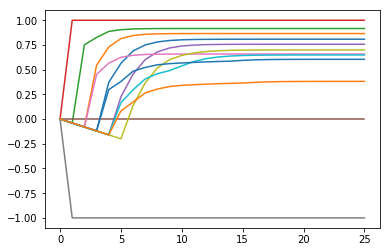

In [86]:
for i in g_list:
    plt.plot(i)
plt.show()